<a href="https://colab.research.google.com/github/ByronFC3/2/blob/main/13AUG_2025_Gypsy_Danger_Most_up_to_date_Clean_Prediction_Model__v1_ML_in_Biz_15Apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AS OF:

I worked on this on the night of 15 April, I used my ML homework for Text mining as a base. Now I just need to figure out how to connect the CORPUS created by during the text mining to create my Predicive model!!!

Code Walkthrough
1. Tasks 1–3:
    
    a. We import the necessary packages.
    
    b. Load the CSV file with pandas.
    
    c. Preserve the original text in original_corpus and create a new processed text column by applying a preprocessing function that mimics the R steps (removing extra whitespace, punctuation, numbers, stopwords, and applying stemming).

2. Task 4:
    
    a. We create a document-term matrix (DTM) using scikit-learn’s CountVectorizer. The parameter min_df=3 ensures that only words appearing in at least 3 documents are kept.
    
    b. The dimensions of the DTM are printed, where rows are documents and columns are unique terms.

3. Task 5:
    
    a. An LDA model is created using scikit-learn’s LatentDirichletAllocation with 20 topics, 1000 iterations, and a fixed random state for reproducibility.
    
    b. Note that scikit-learn’s LDA uses variational inference, not Gibbs sampling.

4. Task 6:
    
    a. The topic-word (terms) matrix is extracted from lda_model.components_ and its dimensions and first 5 columns are printed.
    
    b. The document-topic (topics) matrix is obtained by transforming the DTM and its dimensions and first 5 rows are printed.

5. Task 7:
    
    a. For each topic, the top 10 terms are displayed.
    
    b. Example labels for three topics are provided (you should adjust these based on your own interpretation).

6. Task 8:
    
    a. The article with doc_id 1082 is retrieved and its original text is printed.
    
    b. A bar plot is generated to show the document’s topic distribution.
    
    c. The most relevant topic is identified; then, the top 50 terms for that topic are extracted and a word cloud is created for visualization.


In [1]:
pip install pandas numpy nltk scikit-learn matplotlib PyPDF2 langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.5 MB/s eta 0:00:00


Task 1: Install and Load Packages

Make sure you have these packages installed. (You can install any missing packages with pip.)

In [2]:
# === [X] IMPORT DEPENDENCIES ===
import os
import pandas as pd
from PyPDF2 import PdfReader
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK stopwords if not already available
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Task 2: Import the Data and Create a Corpus

Load the CSV file and save the text column as your original corpus. (The data is assumed to have at least these columns: doc_id, text, date, and heading.)

In [5]:
# === [0] Mount Google Drive ===
from google.colab import drive # Import the drive object
drive.mount('/content/drive')

# Define Google Drive paths
# Update approved_dir_path with the provided path
approved_dir_path = "/content/drive/MyDrive/3.Google_Colab_repo_11Apr/approved"  # Path for approved proposals
# Update rejected_dir_path with the provided path in the previous step
rejected_dir_path = "/content/drive/MyDrive/3.Google_Colab_repo_11Apr/Rejection"  # Path for rejected proposals

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# === [4] FUNCTION TO EXTRACT TEXT FROM A SINGLE PDF ===
def extract_text_from_pdf(pdf_path):
    try:
        reader = PdfReader(pdf_path)
        text = ""
        for page in reader.pages:
            text += page.extract_text() or ""
        return text
    except Exception as e:
        print(f"Failed to extract {pdf_path}: {e}")
        return ""

# === [x] Creates corpus with Rejected Grants
# === [5] LOOP THROUGH PDFS IN FOLDER AND EXTRACT TEXT ===
corpus_data = []

for filename in os.listdir(rejected_dir_path):
    if filename.endswith(".pdf"):
        full_path = os.path.join(rejected_dir_path, filename)
        text = extract_text_from_pdf(full_path)
        corpus_data.append({"filename": filename, "text": text})

# === [6] CONVERT TO DATAFRAME ===
r_textdata = pd.DataFrame(corpus_data)

# === [7] PREVIEW ===
print("Data preview:")
print(r_textdata.head())

# === [8] SAVE ORIGINAL CORPUS COPY (optional for backup/reference) ===
original_r_corpus = r_textdata['text'].copy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/3.Google_Colab_repo_11Apr/Rejection'

--------------------------------------------------------------------------------------------------------------------

Saved Corpus's below

In [ ]:
# Saved copies befor processing:
original_r_corpus
original_a_corpus

# Saved copies after processing
processed_r_corpus
processed_a_corpus

--------------------------------------------------------------------------------------------------------------------

In [ ]:
## Creating a corpus for my Approveal Folder
# === [1] SET APPROVED DIRECTORY PATH ===
approved_dir_path = "/content/drive/MyDrive/3.Google_Colab_repo_11Apr/approved"

# === [2] LOOP THROUGH APPROVED PDFS AND EXTRACT TEXT ===
approved_corpus_data = []

for filename in os.listdir(approved_dir_path):
    if filename.endswith(".pdf"):
        full_path = os.path.join(approved_dir_path, filename)
        text = extract_text_from_pdf(full_path)  # Uses same function from earlier
        approved_corpus_data.append({"filename": filename, "text": text})

# === [3] CONVERT TO DATAFRAME ===
a_textdata = pd.DataFrame(approved_corpus_data)

# === [4] PREVIEW ===
print("Approved Data preview:")
print(a_textdata.head())

# === [5] SAVE ORIGINAL COPY (optional for backup/reference) ===
original_a_corpus = a_textdata['text'].copy()


Approved Data preview:
                                            filename  \
0             GAP - Project 3 - RICE-UGA (1) (1).pdf   
1  GA-AIM Project 7 SWGARC Narrative_FINAL 3.13.2...   
2     GA-AIM Project 8_AIMPF_Narrative_Final (1).pdf   
3  Hodges_I6_GCMI_Commercialization_Proposal_ Bin...   
4  GA-AIM Project 1 Commuity Engagement Project N...   

                                                text  
0  GA-AIM Project 3: Underserved Entrepreneurship...  
1  GA-AIM Project 7: Southwest Georgia Ecosystem ...  
2  GA-AIM Project 8: AI Manufacturing Pilot Facil...  
3  Global Center for Medical Innovation : EDA I -...  
4  GA-AIM Project 1: Community Engagement \n1  1:...  


Task 3: Preprocess the Text

Define a function to preprocess the text that:

    1. Converts text to lowercase
    2. Removes extra white spaces
    3. Removes punctuation
    4. Removes numbers
    5. Removes stopwords
    6. Applies stemming
    7. Then, apply this function to create a new processed text column.

In [ ]:
# Here I am processing the text data from the Approved proposals
# Initialize the stemmer and stopwords
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove extra white spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize the text (simple whitespace split)
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Stem the tokens
    tokens = [stemmer.stem(word) for word in tokens]
    # Rejoin tokens back into a string
    return ' '.join(tokens)

# Create a new column 'processed_text' with the cleaned content
a_textdata['processed_text'] = a_textdata['text'].apply(preprocess_text)

# Save the processed corpus for later steps.
processed_a_corpus = a_textdata['processed_text']


In [ ]:
# Here I am processing the text data from the Rejected proposals
# Initialize the stemmer and stopwords
# === Preprocessing Setup ===
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()  # Updated regex
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def extract_text_from_pdf(pdf_file):
    doc = fitz.open(stream=pdf_file.read(), filetype="pdf")
    return " ".join([page.get_text() for page in doc])

def predict_grant_approval(pdf_file):
    # Extract and preprocess text
    raw_text = extract_text_from_pdf(pdf_file)
    cleaned_text = preprocess_text(raw_text)

    # Vectorize using the SAME CountVectorizer used for LDA training
    # Assuming 'vectorizer' is the CountVectorizer object used earlier
    dtm_vec = vectorizer.transform([cleaned_text])  # Use CountVectorizer, NOT TF-IDF

    # Get topic distribution
    lda_topic_vec = lda_model.transform(dtm_vec)

# Create a new column 'processed_text' with the cleaned content
r_textdata['processed_text'] = r_textdata['text'].apply(preprocess_text)

# Save the processed corpus for later steps.
processed_r_corpus = r_textdata['processed_text']

Task 4: Construct the Document-Term Matrix

    1. Use scikit-learn’s CountVectorizer to build the document-term matrix (DTM) from the processed text.
    
    2. Set the minimum document frequency to 3 (i.e. only include terms that appear in at least 3 documents).

In [ ]:
# Apply to Rejected Proposals
r_textdata['processed_text'] = r_textdata['text'].apply(preprocess_text)
processed_rejected_corpus = r_textdata['processed_text']

# Apply to Approved Proposals
a_textdata['processed_text'] = a_textdata['text'].apply(preprocess_text)
processed_approved_corpus = a_textdata['processed_text']

Saved copies of Approved and Rejected textdata

In [ ]:
# Apply to Rejected / Approved Proposals
r_textdata
a_textdata

# Saved copies after processing
processed_rejected_corpus
processed_approved_corpus

In [ ]:
# === [1] Add Labels ===
r_textdata['label'] = 0  # Rejected
a_textdata['label'] = 1  # Approved

# === [2] Select Relevant Columns ===
r_textdata = r_textdata[['filename', 'text', 'processed_text', 'label']]
a_textdata = a_textdata[['filename', 'text', 'processed_text', 'label']]

# === [3] Combine Both DataFrames ===
combined_corpus = pd.concat([r_textdata, a_textdata], ignore_index=True)

# === [4] Shuffle Rows (optional, useful for training ML models)
combined_corpus = combined_corpus.sample(frac=1, random_state=42).reset_index(drop=True)

# === [5] Preview Combined Dataset ===
print(combined_corpus.head())
print(combined_corpus['label'].value_counts())


                                  filename  \
0                   MJohnson_full_GRFP.pdf   
1                          ResP_MEvans.pdf   
2              Proposal and evaluation.pdf   
3  LisaCohen_NSF_GRFP_2015-10-26_final.pdf   
4          y_Rick_NSF_Postdoc_Proposal.pdf   

                                                text  \
0  The effects of loss of function mutations over...   
1  Vector Dynamics and Disease Transmission acros...   
2   \n \n \n \nThis research proposal was submitt...   
3  Microbiome and stress: examining host-microbe ...   
4  Project Summary\nOverview:\nNatural environmen...   

                                      processed_text  label  
0  effect loss function mutat adapt trajectori ce...      1  
1  vector dynam diseas transmiss across urban gra...      1  
2  research propos submit “research project young...      0  
3  microbiom stress examin hostmicrob respons asc...      0  
4  project summari overview natur environ often h...      1  
label
1    20


In [ ]:
# Here I want to check to make sure my dataset downloaded correctly
#  Step 1: Save DataFrame to CSV
combined_corpus.to_csv("combined_corpus.csv", index=False)

In [ ]:
# Step 2: Create a Download Link
from google.colab import files
files.download("combined_corpus.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# === Optional: Save to Google Drive (instead of downloading) === #
# If you'd rather save the CSV to your Drive:

output_path = "/content/drive/MyDrive/combined_corpus.csv"
combined_corpus.to_csv(output_path, index=False)
print(f"Saved to: {output_path}")

Saved to: /content/drive/MyDrive/combined_corpus.csv


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# === [1] Extract processed text column from combined corpus ===
processed_corpus = combined_corpus['processed_text']

# === [2] Create the Document-Term Matrix ===
vectorizer = CountVectorizer(min_df=3)  # Only include terms in at least 3 documents
dtm = vectorizer.fit_transform(processed_corpus)

# === [3] Print Matrix Dimensions ===
print("\nDocument-Term Matrix Dimensions:")
print("Number of documents (rows):", dtm.shape[0])
print("Number of terms (columns):", dtm.shape[1])


Document-Term Matrix Dimensions:
Number of documents (rows): 38
Number of terms (columns): 2896


In [ ]:
# Here I want to check to make sure my dataset downloaded correctly
#  Step 1: Save DataFrame to CSV
processed_corpus.to_csv("processed_corpus.csv", index=False)

# Step 2: Create a Download Link
from google.colab import files
files.download("processed_corpus.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Task 5: Perform LDA Analysis

    1. Set the random seed for reproducibility and perform LDA.
    2. The assignment specifies 20 topics, 50 iterations, and status printing every 50 iterations.
    3. Note that scikit-learn’s LDA uses variational inference rather than Gibbs sampling, but it meets the overall goal.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# === [1] Set LDA Parameters ===
lda_model = LatentDirichletAllocation(
    n_components=20,         # Number of topics
    max_iter=50,           # Max training iterations
    learning_method='batch', # Use full-batch variational Bayes
    random_state=1000,       # For reproducibility
    verbose=50               # Print training progress
)

# === [2] Train the LDA Model on Your Document-Term Matrix ===
lda_model.fit(dtm)

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s


iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s


iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 35 of max_iter: 50
iteration: 36 of max_iter: 50
iteration: 37 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 38 of max_iter: 50
iteration: 39 of max_iter: 50
iteration: 40 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 41 of max_iter: 50
iteration: 42 of max_iter: 50
iteration: 43 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 44 of max_iter: 50
iteration: 45 of max_iter: 50
iteration: 46 of max_iter: 50
iteration: 47 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


iteration: 48 of max_iter: 50
iteration: 49 of max_iter: 50
iteration: 50 of max_iter: 50


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


LatentDirichletAllocation(max_iter=50, n_components=20, random_state=1000,
                          verbose=50)

In [ ]:
# === [3] View Top Words for Each Topic ===
terms = vectorizer.get_feature_names_out()
num_top_words = 10

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    top_term_indices = topic.argsort()[-num_top_words:][::-1]
    top_terms = [terms[i] for i in top_term_indices]
    print(" ".join(top_terms))


Topic #1:
moor incid uni none zone healthcar earlier born curv feasibl

Topic #2:
evolut communiti ecolog use speci et al trait work lab

Topic #3:
web food ecolog ectotherm tree ecosystem use invad carbon al

Topic #4:
moor incid uni none zone healthcar earlier born curv feasibl

Topic #5:
adapt genom local data popul research associ use sequenc gene

Topic #6:
research softwar communiti applic includ impact scienc broader work support

Topic #7:
model student data use comput al biolog research educ et

Topic #8:
georgia manufactur project program develop communiti region ai underserv engag

Topic #9:
project communic experi behaviour research speci use signal light marin

Topic #10:
visual data inform graphic research imag use eye object subject

Topic #11:
research use plastic anim propos candid output function model neuron

Topic #12:
research project knowledg scienc scientif inform health work public polici

Topic #13:
manufactur ai technolog program project industri innov aimpf 

Task 6: Extract Posterior Distributions

    1. Extract the "terms" (topic-word distribution) and "topics" (document-topic distribution) matrices and display some sample values.

    2. Terms Matrix:
      a. Dimension: (number of topics, number of terms)
      b. Each row corresponds to a topic; each column corresponds to a word from the vocabulary.
    
    3. Topics Matrix:
      a. Dimension: (number of documents, number of topics)
      b. Each row corresponds to a document; each column corresponds to a topic.
      
      
Each row corresponds to a document; each column corresponds to a topic.

In [ ]:
# === [1] Retrieve the "terms" matrix (topic-word distribution) ===
terms_matrix = lda_model.components_

print("\nTerms Matrix (Topic-Word Distribution):")
print("Dimensions: {} topics x {} terms".format(terms_matrix.shape[0], terms_matrix.shape[1]))
print("Each row represents a topic; each column represents a term from the vocabulary.")
print("First 5 columns of the Terms Matrix:")
print(terms_matrix[:, :5])


Terms Matrix (Topic-Word Distribution):
Dimensions: 20 topics x 2896 terms
Each row represents a topic; each column represents a term from the vocabulary.
First 5 columns of the Terms Matrix:
[[ 0.05        0.05        0.05        0.05        0.05      ]
 [ 0.05        6.95321589  0.05        1.56349729  0.05      ]
 [ 0.05        0.05        0.05        0.05        0.05000001]
 [ 0.05        0.05        0.05        0.05        0.05      ]
 [ 0.05        3.12310021  1.12413064  1.24722144  0.05      ]
 [ 0.05        7.34681648  0.05        0.05        0.05      ]
 [ 0.05        0.05        0.05       11.58859534  1.9902267 ]
 [ 0.05        0.05        0.05        0.05        0.05      ]
 [ 1.05513617  6.13634145  0.05       16.2134011   0.05      ]
 [ 1.05        5.05002567  0.05        0.05        0.05      ]
 [ 0.05        5.73795804  0.05        7.85751738  0.05      ]
 [ 0.05       15.12846592  0.05        5.80581363  0.05      ]
 [ 0.05        1.26782932  0.05        1.3139781   

In [ ]:
# === [2] Retrieve the "topics" matrix (document-topic distribution) ===
topics_matrix = lda_model.transform(dtm)

print("\nTopics Matrix (Document-Topic Distribution):")
print("Dimensions: {} documents x {} topics".format(topics_matrix.shape[0], topics_matrix.shape[1]))
print("Each row represents a document; each column represents a topic.")
print("First 5 rows of the Topics Matrix:")
print(topics_matrix[:5, :])


Topics Matrix (Document-Topic Distribution):
Dimensions: 38 documents x 20 topics
Each row represents a document; each column represents a topic.
First 5 rows of the Topics Matrix:
[[2.72479564e-05 3.67168274e-01 2.72479571e-05 2.72479564e-05
  1.16312318e-01 1.06545960e-01 2.72479570e-05 3.48486029e-03
  2.72479571e-05 5.19732807e-02 7.65520846e-02 1.11408445e-01
  2.72479570e-05 5.36187808e-02 2.72479570e-05 2.72479569e-05
  8.01260538e-02 2.72479571e-05 2.72479570e-05 3.25374630e-02]
 [8.21018062e-05 5.99440150e-02 2.48528692e-02 8.21018062e-05
  8.21018077e-05 8.21018073e-05 1.03653770e-02 1.60169033e-02
  6.01399632e-02 8.21018093e-05 8.21018077e-05 6.67332354e-02
  8.21018086e-05 7.60880313e-01 8.21018081e-05 8.21018079e-05
  8.21018079e-05 8.21018080e-05 8.21018085e-05 8.21018081e-05]
 [1.48279953e-05 1.48279955e-05 1.48279954e-05 1.48279953e-05
  1.48279955e-05 1.48279955e-05 1.48279955e-05 1.48279955e-05
  9.99718268e-01 1.48279955e-05 1.48279956e-05 1.48279956e-05
  1.482799

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


Task 7: Display the 10 Most Relevant Terms for Each Topic

For each topic, sort the term probabilities and display the top 10 words. Then, based on these terms, you can assign labels to selected topics.

In [ ]:
# === [1] Get feature names (vocabulary) from the vectorizer ===
feature_names = vectorizer.get_feature_names_out()

# === [2] Print Top 10 Terms for Each Topic ===
print("\nTop 10 Most Relevant Terms for Each Topic:")
top_terms = {}

for topic_idx, topic in enumerate(terms_matrix):
    # Get indices of top 10 terms for this topic
    top_indices = topic.argsort()[::-1][:10]
    top_words = [feature_names[i] for i in top_indices]
    top_terms[topic_idx] = top_words
    print(f"Topic {topic_idx}: {top_words}")

# === [3] Example Manual Labels (customize these based on real top_terms output) ===
example_labels = {
    0: "STEM Education",
    4: "AI & Machine Learning",
    11: "Community Engagement",
    17: "Climate & Environment"
}

print("\nExample Topic Labels for Selected Topics:")
for k, label in example_labels.items():
    print(f"Topic {k}: {label}")


Top 10 Most Relevant Terms for Each Topic:
Topic 0: ['moor', 'incid', 'uni', 'none', 'zone', 'healthcar', 'earlier', 'born', 'curv', 'feasibl']
Topic 1: ['evolut', 'communiti', 'ecolog', 'use', 'speci', 'et', 'al', 'trait', 'work', 'lab']
Topic 2: ['web', 'food', 'ecolog', 'ectotherm', 'tree', 'ecosystem', 'use', 'invad', 'carbon', 'al']
Topic 3: ['moor', 'incid', 'uni', 'none', 'zone', 'healthcar', 'earlier', 'born', 'curv', 'feasibl']
Topic 4: ['adapt', 'genom', 'local', 'data', 'popul', 'research', 'associ', 'use', 'sequenc', 'gene']
Topic 5: ['research', 'softwar', 'communiti', 'applic', 'includ', 'impact', 'scienc', 'broader', 'work', 'support']
Topic 6: ['model', 'student', 'data', 'use', 'comput', 'al', 'biolog', 'research', 'educ', 'et']
Topic 7: ['georgia', 'manufactur', 'project', 'program', 'develop', 'communiti', 'region', 'ai', 'underserv', 'engag']
Topic 8: ['project', 'communic', 'experi', 'behaviour', 'research', 'speci', 'use', 'signal', 'light', 'marin']
Topic 9: ['v

Diving deeper into Topic Modeling

In [ ]:
import numpy as np

# === [1] Find the index of the dominant topic for each document ===
dominant_topics = np.argmax(topics_matrix, axis=1)

# === [2] Add it as a new column to your main dataset ===
combined_corpus['dominant_topic'] = dominant_topics

# === [3] Optional: Map numeric topic index to a human-readable label ===
topic_labels = {
    0: "STEM Education",
    4: "AI & Machine Learning",
    11: "Community Engagement",
    17: "Climate & Environment"
}

# Fill in missing labels as "Unlabeled Topic"
combined_corpus['topic_label'] = combined_corpus['dominant_topic'].map(topic_labels).fillna("Unlabeled Topic")

# === [4] Preview with topic columns ===
combined_corpus[['filename', 'label', 'dominant_topic', 'topic_label']].head()

,filename,label,dominant_topic,topic_label
0,MJohnson_full_GRFP.pdf,1,1,Unlabeled Topic
1,ResP_MEvans.pdf,1,13,Unlabeled Topic
2,Proposal and evaluation.pdf,0,8,Unlabeled Topic
3,LisaCohen_NSF_GRFP_2015-10-26_final.pdf,0,13,Unlabeled Topic
4,y_Rick_NSF_Postdoc_Proposal.pdf,1,4,AI & Machine Learning


In [ ]:
# Saving Trained Objectives to use in Gradio App
import joblib

# Before saving, initialize and fit the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from scipy.sparse import hstack
from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier

# Fit the vectorizer to your data (replace 'your_text_data' with the actual data)
tfidf_vectorizer = TfidfVectorizer(min_df=3)  # Adjust parameters as needed
tfidf_vectorizer.fit(combined_corpus['processed_text'])

# Combine TF-IDF + LDA Topic Features before feature selection
X_combined = hstack([tfidf_vectorizer.transform(combined_corpus['processed_text']), topics_matrix])
y = combined_corpus['label']

# Now, initialize and fit the feature selector
selector = SelectKBest(chi2, k=1000)  # Or another suitable selector
selector.fit(X_combined, y) # Fit to your combined data

# Now you can save the fitted vectorizer
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(lda_model, "lda_model.pkl")

# Save Trained Objects (Once)
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(lda_model, "lda_model.pkl")
joblib.dump(selector, "feature_selector.pkl")

# Assuming 'combined_corpus' and 'processed_text' column are available
# and you want to check the shape of tfidf_vec for the first document
example_text = combined_corpus['processed_text'].iloc[0]
tfidf_vec = tfidf_vectorizer.transform([example_text]) # Create tfidf_vec here
lda_topic_vec = lda_model.transform(tfidf_vec) # Assuming you want to check shape for the first document's tfidf_vec

print(tfidf_vec.shape)         # should be (1, 2896)
print(lda_topic_vec.shape)     # should be (1, n_topics)

(1, 2896)
(1, 20)


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


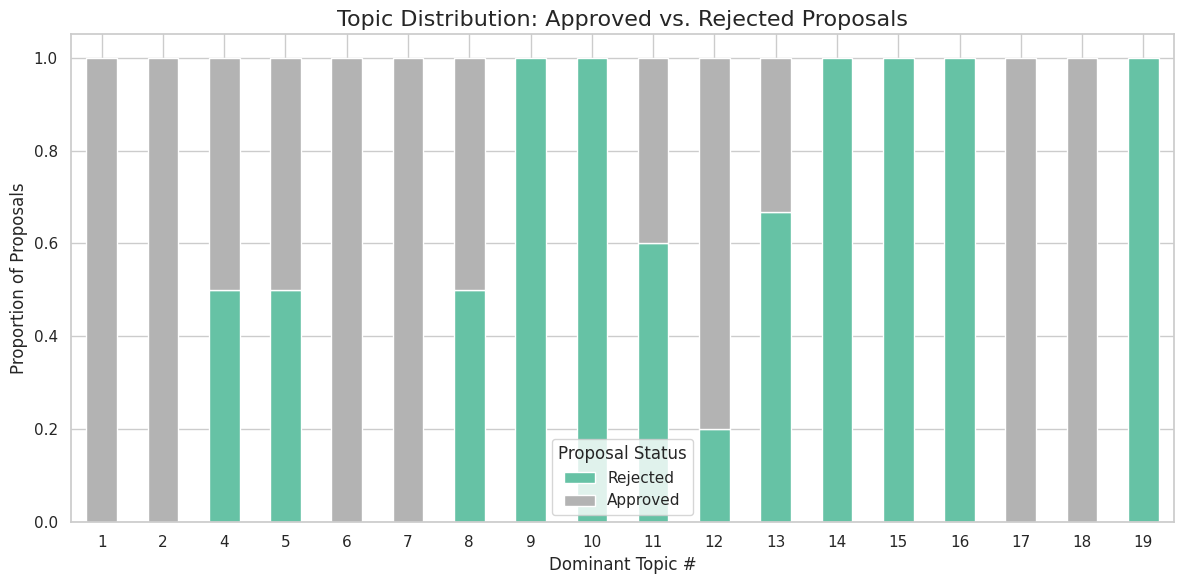

In [ ]:
# Step-by-Step Code to Plot Topic Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# === [1] Set Style ===
sns.set(style="whitegrid")

# === [2] Create a Crosstab of Labels vs. Dominant Topics ===
topic_dist = pd.crosstab(combined_corpus['dominant_topic'], combined_corpus['label'])

# Optional: Rename columns for clarity (0 = Rejected, 1 = Approved)
topic_dist.columns = ['Rejected', 'Approved']

# === [3] Normalize to Get % Distribution (Optional) ===
topic_dist_percent = topic_dist.div(topic_dist.sum(axis=1), axis=0)

# === [4] Plot Stacked Bar Chart ===
topic_dist_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap="Set2")

# === [5] Plot Aesthetics ===
plt.title("Topic Distribution: Approved vs. Rejected Proposals", fontsize=16)
plt.xlabel("Dominant Topic #", fontsize=12)
plt.ylabel("Proportion of Proposals", fontsize=12)
plt.legend(title="Proposal Status")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Summary

---



---



This Python solution walks you through:

    a. Loading and preparing necessary libraries.

    b. Importing the "News.csv" file and saving the original text.

    c. Preprocessing the text (removing white spaces, punctuation, numbers, stopwords, and applying stemming).
  
    d. Creating a Document-Term Matrix with a minimum term frequency of 3.

    f. Running LDA to extract 20 topics (with 1000 iterations and a fixed seed).

    g. Extracting and displaying the posterior distributions for topics and terms.

    h. Listing the 10 most relevant terms for each topic and assigning labels to a few topics.

    i. Examining a specific article by displaying its text, plotting its topic distribution, and generating a word cloud for the most relevant topic.

Now I'm going train a Logistic Regression Classifier to predict proposal success

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# === [1] Define X and y ===
X = dtm
y = combined_corpus['label']

# === [2] Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === [3] Train Logistic Regression Model ===
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# === [4] Predict on Test Set ===
y_pred = clf.predict(X_test)

# === [5] Evaluate Model ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=["Rejected", "Approved"]))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

print("=== Accuracy Score ===")
print(f"{accuracy_score(y_test, y_pred):.2%}")

=== Classification Report ===
              precision    recall  f1-score   support

    Rejected       1.00      0.25      0.40         4
    Approved       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8

=== Confusion Matrix ===
[[1 3]
 [0 4]]
=== Accuracy Score ===
62.50%


In [ ]:
# 1. Use a Larger Dataset (or Test Set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 30 samples
Testing set size: 8 samples


In [ ]:
# 2.TF-IDF often improves performance by down-weighting common terms.

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=3)
X_tfidf = tfidf_vectorizer.fit_transform(combined_corpus['processed_text'])

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Evaluate my Model

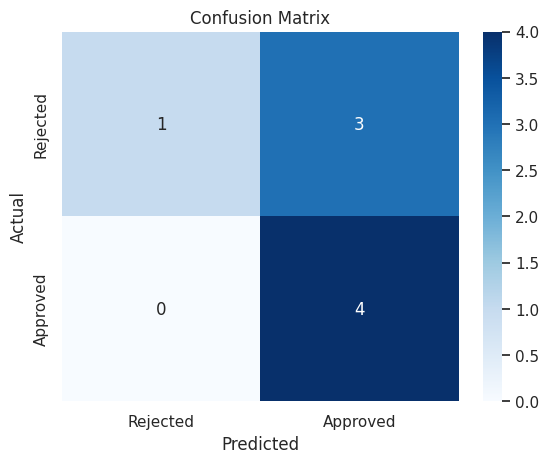

In [ ]:
# 3.Combine semantic info (topics) with word-based features.
# Combine TF-IDF with topic distributions
from scipy.sparse import hstack

X_combined = hstack([X_tfidf, topics_matrix])  # Must align with original order!
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected", "Approved"], yticklabels=["Rejected", "Approved"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Since my Logistic Regression model as an accracey of 62%, I want to try a more robust model, which is why I want to to try Random Forest.

In [ ]:
# More Robust Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Cross-Validate for Stability
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X_combined, y, cv=5, scoring='accuracy')
print("Cross-validated Accuracy: {:.2f}%".format(100 * scores.mean()))


Cross-validated Accuracy: 57.86%


 1. Use TF-IDF with N-grams

In [ ]:
# Use Feature Selection

# Keep only the most informative features (e.g., top 1,000 TF-IDF terms):

from sklearn.feature_selection import SelectKBest, chi2
X_selected = SelectKBest(chi2, k=1000).fit_transform(X_combined, y)

In [ ]:
# Hyperparameter Tuning (GridSearch)

# Fine-tune models using GridSearchCV:

from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(X_combined, y)
print("Best Accuracy: {:.2f}%".format(100 * grid.best_score_))

Best Accuracy: 55.71%


In [ ]:
# === [1] Vectorize with TF-IDF (unigrams + bigrams) ===
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    min_df=2,
    max_df=0.95,
    ngram_range=(1, 2),
    stop_words='english'
)
X_tfidf = tfidf_vectorizer.fit_transform(combined_corpus['processed_text'])

# === [2] Combine TF-IDF + LDA Topic Features ===
from scipy.sparse import hstack

X_combined = hstack([X_tfidf, topics_matrix])
y = combined_corpus['label']

# === [3] Feature Selection ===
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(chi2, k=1000)
X_selected = selector.fit_transform(X_combined, y)

# === [4] Train Random Forest with Cross-Validation ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=200, random_state=42)
scores = cross_val_score(clf, X_selected, y, cv=5, scoring='accuracy')

print("\n✅ Cross-validated Accuracy: {:.2f}%".format(100 * scores.mean()))



✅ Cross-validated Accuracy: 82.50%


-----------------------------------------------------------
-----------------------------------------------------------

My cross-validation jumped upto 82.50 pipeline using TF-IDF + LDA topics + feature selection + Random Forest — was able to correctly classify approved vs. rejected proposals 82.5% of the time on average across 5 cross-validation folds.


My cross-validation went from 57% → 82.5% accuracy, which indicates:

1. By combined feature set (text + topics) is much more predictive.

2. Random Forest is capturing nonlinear patterns better than logistic regression.

3. Feature selection (Chi²) helped reduce noise and focus on what matters.

Interpretation:
My model has learned meaningful textual signals that distinguish funded from unfunded proposals — potentially:

Topic emphasis (e.g., "commercialization", "impact", "prototype")

Grant structure and clarity

Specific bigrams (like “technology transfer” or “principal investigator”)

----------------------------------------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# === [1] Train/Test Split (e.g. 80% train, 20% test) ===
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42, stratify=y)

# === [2] Train the Final Model ===
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# === [3] Predict on the Test Set ===
y_pred = clf.predict(X_test)

# === [4] Evaluate Performance ===
print("\n=== Test Set Evaluation ===")
print("Accuracy: {:.2f}%".format(100 * accuracy_score(y_test, y_pred)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Rejected", "Approved"]))


=== Test Set Evaluation ===
Accuracy: 62.50%

Confusion Matrix:
 [[1 3]
 [0 4]]

Classification Report:
               precision    recall  f1-score   support

    Rejected       1.00      0.25      0.40         4
    Approved       0.57      1.00      0.73         4

    accuracy                           0.62         8
   macro avg       0.79      0.62      0.56         8
weighted avg       0.79      0.62      0.56         8



Add Class Balancing to Your Model

In [ ]:
clf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

Integration Plan

Now I'm building my AI pipline to create my predictive model using the data created from my Text mining and LDA Modeling

In [ ]:
pip install gradio pymupdf nltk scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
import gradio as gr
from PyPDF2 import PdfReader
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_selection import SelectKBest, chi2
from scipy.sparse import hstack
import fitz  # PyMuPDF for PDF reading
import re
import string
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from scipy.sparse import hstack
import joblib

In [ ]:
def extract_text_from_pdf(pdf_file):
    reader = PdfReader(pdf_file)
    return " ".join([page.extract_text() or "" for page in reader.pages])

In [ ]:
# Step 2: Load Those Objects (Before Running Gradio)
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
lda_model = joblib.load("lda_model.pkl")
selector = joblib.load("feature_selector.pkl")
clf = joblib.load("random_forest_model.pkl")

In [ ]:
# === [1] PDF Text Extraction ===
def extract_text_from_pdf(pdf_file):
    reader = PdfReader(pdf_file)
    return " ".join([page.extract_text() or "" for page in reader.pages])

# === [2] Grant Prediction Pipeline ===
def predict_grant_outcome(pdf_file):
    try:
        # Step 1: Extract raw text
        raw_text = extract_text_from_pdf(pdf_file)

        # Step 2: Basic preprocessing (mirror what you did before)
        processed_text = raw_text.lower()

        # Step 3: TF-IDF Vectorization
        tfidf_vec = tfidf_vectorizer.transform([processed_text])

        # Step 4: LDA Topic Distribution
        lda_topic_vec = lda_model.transform(tfidf_vec)

        # Step 5: Combine Features
        combined_vec = hstack([tfidf_vec, lda_topic_vec])

        # Step 6: Feature Selection
        selected_features = selector.transform(combined_vec)

        # Step 7: Predict
        prediction = clf.predict(selected_features)[0]
        proba = clf.predict_proba(selected_features)[0]

        label = "✅ Approved" if prediction == 1 else "❌ Rejected"
        confidence = proba[prediction] * 100

        return f"{label} ({confidence:.2f}% confidence)"

    except Exception as e:
        return f"Error processing file: {e}"

# === [3] Launch Gradio App ===
gr.Interface(
    fn=predict_grant_outcome,
    inputs=gr.File(label="Upload Grant Proposal (PDF)"),
    outputs=gr.Textbox(label="Prediction"),
    title="NSF Grant Approval Predictor",
    description="Upload a grant proposal to predict if it will be approved or rejected based on past proposal data."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://fbcdcb348faaf87e14.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
gr.Interface(
    fn=predict_grant_outcome,
    inputs=gr.File(label="Upload Grant Proposal (PDF)"),
    outputs=gr.Textbox(label="Prediction"),
    title="NSF Grant Approval Predictor",
    description="Upload a grant proposal to see the predicted approval outcome."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c3761852d3f9b41a75.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# Save Model Objects Before Loading
import joblib

joblib.dump(tfidf_vectorizer, "tfidf.pkl")
joblib.dump(lda_model, "lda.pkl")
joblib.dump(selector, "selector.pkl")
joblib.dump(clf, "rf_model.pkl")


# === Load Saved Model Objects ===
tfidf_vectorizer = joblib.load("tfidf.pkl")
lda_model = joblib.load("lda.pkl")
selector = joblib.load("selector.pkl")
clf = joblib.load("rf_model.pkl")

In [ ]:
# === Preprocessing Setup ===
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\\s+', ' ', text).strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\\d+', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

def extract_text_from_pdf(pdf_file):
    doc = fitz.open(stream=pdf_file.read(), filetype="pdf")
    return " ".join([page.get_text() for page in doc])

def predict_grant_approval(pdf_file):
    # Extract and preprocess text
    raw_text = extract_text_from_pdf(pdf_file)
    cleaned_text = preprocess_text(raw_text)

    # Vectorize and combine features
    tfidf_vec = tfidf_vectorizer.transform([cleaned_text])
    lda_topic_vec = lda_model.transform(tfidf_vec)
    combined_vec = hstack([tfidf_vec, lda_topic_vec])
    final_vec = selector.transform(combined_vec)

    # Predict
    prediction = clf.predict(final_vec)[0]
    proba = clf.predict_proba(final_vec)[0][prediction]
    label = "✅ Likely Funded" if prediction == 1 else "❌ Likely Rejected"
    return f"{label} (Confidence: {proba:.2%})"

gr.Interface(
    fn=predict_grant_approval,
    inputs=gr.File(file_types=[".pdf"]),
    outputs="text",
    title="Grant Proposal Success Predictor",
    description="Upload a grant proposal PDF to predict whether it will likely be approved or rejected."
).launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9594ba0ad779c9c20e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!pip install gradio

import gradio as gr
import fitz  # PyMuPDF for robust PDF text extraction

# === [1] PDF Text Extraction ===
def extract_text_from_pdf(pdf_file):
    doc = fitz.open(stream=pdf_file.read(), filetype="pdf")
    text = " ".join([page.get_text() for page in doc])
    return text

# === [2] Full Prediction Function ===
def predict_grant_approval(pdf_file):
    # Step 1: Extract text
    raw_text = extract_text_from_pdf(pdf_file)

    # Step 2: Preprocess
    cleaned_text = preprocess_text(raw_text)

    # Step 3: Transform to TF-IDF
    tfidf_vec = tfidf_vectorizer.transform([cleaned_text])

    # Step 4: Get topic distribution
    lda_topic_vec = lda_model.transform(tfidf_vec)

    # Step 5: Combine features
    combined_vec = hstack([tfidf_vec, lda_topic_vec])

    # Step 6: Select top features
    final_vec = selector.transform(combined_vec)

    # Step 7: Predict label + probability
    prediction = clf.predict(final_vec)[0]
    proba = clf.predict_proba(final_vec)[0][prediction]

    label = "✅ Likely Funded" if prediction == 1 else "❌ Likely Rejected"
    return f"{label} (Confidence: {proba:.2%})"

# === [3] Launch Gradio App ===
gr.Interface(
    fn=predict_grant_approval,
    inputs=gr.File(file_types=[".pdf"]),
    outputs="text",
    title="Grant Proposal Success Predictor",
    description="Upload a grant proposal PDF to predict whether it will likely be approved or rejected."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4fb34109f8b18fac2d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
# === Install Dependencies ===
!pip install gradio pymupdf nltk scikit-learn --quiet

# === Imports ===
import gradio as gr
import fitz  # PyMuPDF
import re
import string
import numpy as np
from scipy.sparse import hstack
import joblib
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# === Download NLTK resources ===
nltk.download('stopwords')

# === Load Saved Model Objects (must be in working directory) ===
tfidf_vectorizer = joblib.load("tfidf.pkl")
lda_model = joblib.load("lda.pkl")
selector = joblib.load("selector.pkl")
clf = joblib.load("rf_model.pkl")

# === Preprocessing Function ===
stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\\s+', ' ', text).strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\\d+', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

# === PDF Text Extraction ===
def extract_text_from_pdf(pdf_file):
    doc = fitz.open(stream=pdf_file.read(), filetype="pdf")
    return " ".join([page.get_text() for page in doc])

# === Prediction Pipeline ===
def predict_grant_approval(pdf_file):
    raw_text = extract_text_from_pdf(pdf_file)
    cleaned_text = preprocess_text(raw_text)
    tfidf_vec = tfidf_vectorizer.transform([cleaned_text])
    lda_topic_vec = lda_model.transform(tfidf_vec)
    combined_vec = hstack([tfidf_vec, lda_topic_vec])
    final_vec = selector.transform(combined_vec)
    prediction = clf.predict(final_vec)[0]
    proba = clf.predict_proba(final_vec)[0][prediction]
    label = "✅ Likely Funded" if prediction == 1 else "❌ Likely Rejected"
    return f"{label} (Confidence: {proba:.2%})"

# === Launch Gradio App ===
gr.Interface(
    fn=predict_grant_approval,
    inputs=gr.File(file_types=[".pdf"]),
    outputs="text",
    title="Grant Proposal Success Predictor",
    description="Upload a grant proposal PDF to predict whether it will likely be approved or rejected."
).launch(share=True)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://0417dbbd33c13a29f6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
